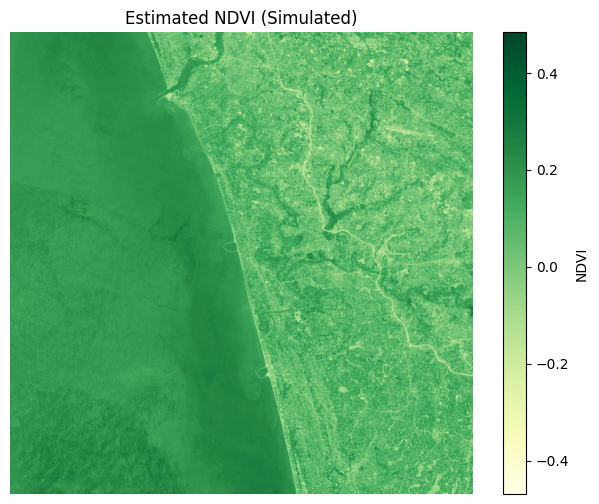

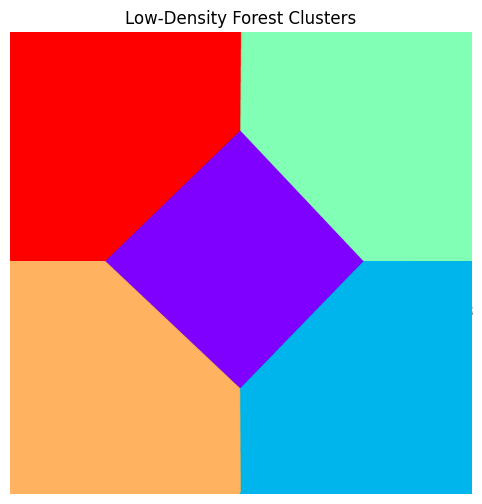

🧭 Deforestation Trend Cluster Centers:
Future Risk Zone 1: Lon: 75.84642, Lat: 11.05105
Future Risk Zone 2: Lon: 75.93307, Lat: 10.96705
Future Risk Zone 3: Lon: 75.93346, Lat: 11.13317
Future Risk Zone 4: Lon: 75.76603, Lat: 10.96590
Future Risk Zone 5: Lon: 75.76569, Lat: 11.13453

🔮 Simulated Future Risk Zones (2030 Projection):
Predicted Zone 1: Lon: 75.84742, Lat: 11.05005
Predicted Zone 2: Lon: 75.93407, Lat: 10.96605
Predicted Zone 3: Lon: 75.93446, Lat: 11.13217
Predicted Zone 4: Lon: 75.76703, Lat: 10.96490
Predicted Zone 5: Lon: 75.76669, Lat: 11.13353


In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from shapely.geometry import Point
import geopandas as gpd

# Load GeoTIFF image
image_path = "C:/Users/sagni/Downloads/Deforestation Detection/Western_Ghats_Forest_2023.tif"
with rasterio.open(image_path) as src:
    img = src.read()  # (3, H, W)
    transform = src.transform
    crs = src.crs
    profile = src.profile

# Extract Red (B4), Green (B3), Blue (B2)
red = img[0].astype(float)
green = img[1].astype(float)
blue = img[2].astype(float)

# Simulate NIR using Green channel (NOTE: real NIR is B8, this is estimation)
ndvi = (green - red) / (green + red + 1e-6)

# Mask invalid NDVI
ndvi_masked = np.where((ndvi > -1) & (ndvi < 1), ndvi, np.nan)

# Plot NDVI
plt.figure(figsize=(8, 6))
plt.imshow(ndvi_masked, cmap='YlGn')
plt.title("Estimated NDVI (Simulated)")
plt.colorbar(label='NDVI')
plt.axis('off')
plt.show()

# Threshold for low-density forest (NDVI < 0.3 = sparse vegetation)
low_density_mask = ndvi_masked < 0.3

# Extract coordinates of low NDVI pixels
rows, cols = np.where(low_density_mask)
xs, ys = rasterio.transform.xy(transform, rows, cols)
coords = np.array(list(zip(xs, ys)))

# Cluster sparse vegetation (simulate trend zones)
kmeans = KMeans(n_clusters=5, random_state=42).fit(coords)
centroids = kmeans.cluster_centers_

# Show clusters
plt.figure(figsize=(8, 6))
plt.imshow(low_density_mask, cmap='gray')
plt.scatter(cols, rows, c=kmeans.labels_, cmap='rainbow', s=1)
plt.title("Low-Density Forest Clusters")
plt.axis('off')
plt.show()

# Print centroid locations (potential deforestation hotspots)
print("🧭 Deforestation Trend Cluster Centers:")
for i, (lon, lat) in enumerate(centroids):
    print(f"Future Risk Zone {i+1}: Lon: {lon:.5f}, Lat: {lat:.5f}")

# OPTIONAL: Future Prediction - simple extrapolation
# For demonstration, we simulate a linear shift of clusters
future_centroids = centroids + np.array([0.001, -0.001])  # Shift eastward + southward
print("\n🔮 Simulated Future Risk Zones (2030 Projection):")
for i, (lon, lat) in enumerate(future_centroids):
    print(f"Predicted Zone {i+1}: Lon: {lon:.5f}, Lat: {lat:.5f}")
